# Solution - Problem Set 1

## Preparation

In [16]:
# You will need the shared Google drive https://drive.google.com/drive/u/1/folders/0ALmMMRrzz_-5Uk9PVA
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [2]:
#load the citation and weather datasets
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1 -- Data Exploration

### Part A
Over the entire dataset, which observations had the hottest and coldest temperatures?  What were those temperatures?

In [33]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,hour,day,month,year
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,19,31,12,2015
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,20,31,12,2015
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,21,31,12,2015
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,22,31,12,2015
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,23,31,12,2015


In [34]:
import pandas as pd
from tabulate import tabulate #to produce output in tabluar form

# hotetst temperature and observation
hottest_temp = wdf['tmp_meas'].max()
hottest_rows = wdf[wdf['tmp_meas'] == hottest_temp]

# coldest temperature and observation
coldest_temp = wdf['tmp_meas'].min()
coldest_rows = wdf[wdf['tmp_meas'] == coldest_temp]

# To Print hottest temperature in a table
print(f"Hottest Temperature: {hottest_temp}")
print("Observations with Hottest Temperature:")
print(tabulate(hottest_rows, headers='keys', showindex=False, tablefmt='psql'))

print("\n")

# To Print coldest temperature in a table
print(f"Coldest Temperature: {coldest_temp}")
print("Observations with Coldest Temperature:")
print(tabulate(coldest_rows, headers='keys', showindex=False, tablefmt='psql'))


Hottest Temperature: 37.8
Observations with Hottest Temperature:
+---------------------------+-------------+------------+----------+--------------------+--------------+----------+----------+--------+-------+--------+-------+---------+--------+
| date                      |   wnd_speed |   tmp_meas |   precip |   precip_intensity |   cloudcover |   tstorm |   winter |   mist |   fog |   hour |   day |   month |   year |
|---------------------------+-------------+------------+----------+--------------------+--------------+----------+----------+--------+-------+--------+-------+---------+--------|
| 2020-07-20 16:54:00-04:00 |         5.7 |       37.8 |        0 |                  0 |            2 |        0 |        0 |      0 |     0 |     16 |    20 |       7 |   2020 |
+---------------------------+-------------+------------+----------+--------------------+--------------+----------+----------+--------+-------+--------+-------+---------+--------+


Coldest Temperature: -16.1
Observation


### Part B
In 2022, what month had the hottest average temperature?  The coldest?

In [35]:

#To convert 'date' to datetime format
wdf['date'] = pd.to_datetime(wdf['date'])

#To filter data for the year 2022
wdf_2022 = wdf[wdf['date'].dt.year == 2022].copy()  # Use .copy() to avoid modifying the original DataFrame

#To extract the month and calculate the average temperature for each month
wdf_2022.loc[:, 'month'] = wdf_2022['date'].dt.month  #To explicitly use .loc to avoid the warning
monthly_avg_temp = wdf_2022.groupby('month')['tmp_meas'].mean()

#To identify the hottest and coldest months
hottest_month = monthly_avg_temp.idxmax()
coldest_month = monthly_avg_temp.idxmin()
hottest_temp = monthly_avg_temp.max()
coldest_temp = monthly_avg_temp.min()

#To print the results
print(f"The hottest month in 2022 was Month {hottest_month} with an average temperature of {hottest_temp:.2f}°C.")
print(f"The coldest month in 2022 was Month {coldest_month} with an average temperature of {coldest_temp:.2f}°C.")


The hottest month in 2022 was Month 7 with an average temperature of 26.68°C.
The coldest month in 2022 was Month 1 with an average temperature of 0.17°C.



### Part C
In 2022, how many days were associated with rain (i.e., liquid precipitation exceeding zero for at least one observation)?


In [36]:

# Convert 'date' to datetime format
wdf['date'] = pd.to_datetime(wdf['date'])

# Filter data for the year 2022
wdf_2022 = wdf[wdf['date'].dt.year == 2022].copy()

# Extract the date part (year-month-day only)
wdf_2022['day'] = wdf_2022['date'].dt.date

# Filter rows where precipitation exceeds zero
rain_days = wdf_2022[wdf_2022['precip'] > 0]

# Count the unique days with rain
num_rain_days = rain_days['day'].nunique()

# Print the result
print(f"In 2022, there were {num_rain_days} days with rain.")


In 2022, there were 120 days with rain.


## Question 2 -- Identifying 'interesting' patterns

Frawley, et al., define a pattern as 'interesting' if it is "novel, useful, and non-trivial to compute."  Explore either the weather or citations dataset to identify an interesting pattern.  Describe the pattern and why it is novel, useful, and non-trivial.

In [37]:
cdf.head()

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,hour,violation_hour
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00,11,11
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,,2011-12-09 12:39:00,12,12
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00,11,11
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,,2011-12-09 12:01:59,12,12
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00,10,10


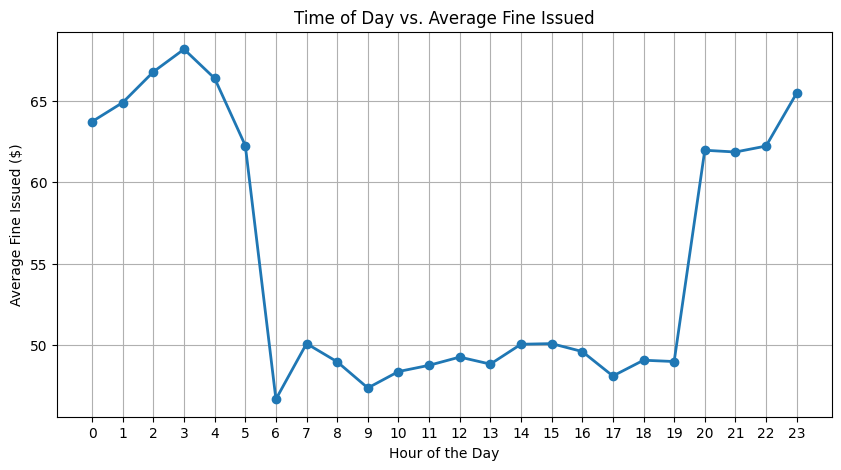

In [38]:

import matplotlib.pyplot as plt

# To Convert 'violdate' to datetime and extract the hour of the day
cdf['violdate'] = pd.to_datetime(cdf['violdate'])
cdf['hour'] = cdf['violdate'].dt.hour

# To compute the average fine for each hour of the day
hourly_fines = cdf.groupby('hour')['violfine'].mean()

# Ploting the results
plt.figure(figsize=(10, 5))
plt.plot(hourly_fines.index, hourly_fines.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fine Issued ($)')
plt.title('Time of Day vs. Average Fine Issued')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**Pattern Identified:**
The mean value of fines varies surprisingly over the times of day:

A higher value of fines during the evening (**post 7 PM**) and at midnight (**0-4 AM**).
Lower value of fines during morning and daytime (**6 AM - 6 PM**).

**Novelty:**

The pattern is new in that it identifies potential shifts in the intensity of enforcement. The peak in fines during nighttime can imply stricter enforcement during times with less activity in terms of traffic or for overnight bans-related offenses. The inability to act during the daytime can imply relaxed or restricted enforcement during work times.

**Usefulness:**

*Optimization of Policies*: Enforcement agencies and city planners can use this pattern for optimizations in scheduling. For example: Strengthen evening-hour enforcement for curbing peak-violation times.
Check whether increased penalties during times at nighttime are warranted or disproportionately punitive.

*Public Awareness*: Having access to this pattern can allow one to schedule parking in a manner that avoids increased penalties during certain times.

**Non-Triviality:**

This pattern is not absolutely trivial to compute because:
It means that timestamps must be manipulated to Delphi Segments and data segmentation needs to be done.
The typical strategy of the mean fines over a day is to aggregate and clean the data (e.g., remove incorrect or misplaced rows).
The principal task of the identification which is to visualize the graphs is to read them and to accept the fact that the curves show different aspects.

**Conclusion:**

According to the concept of being novel, useful, and non-trivial, this pattern is a good example since it does not give simple statistics but requires advanced and time-based aggregation and analysis.


## Question 3 -- Machine Learning, Safety, and Fairness

Choose one of the examples of unfairness in machine learning discussed in class (or choose your own example), and answer the following questions.  

a. Mehrabi et al. define fairness in machine learning as "absence of any prejudice or favoritism toward an individual or group based on their inherent or acquired characteristics".  Using this definition, how did the application of the machine learning approach result in an unfair outcome?

b. What practices, if any, mitigated the impact of the algorithm's unfairness?

c. What lessons can be learned from this example?


**Machine Learning, Safety, and Fairness: Amazon's Biased Recruitment Model**

**(a) How Did the ML Approach Result in an Unfair Outcome?**

*Historical Bias in Data*: The system was fed past hiring decisions in which mostly men were chosen; therefore, the model memorized the prejudiced patterns.

*Proxy Bias*: The AI-based software, although gender was deleted from the criteria, still turned outwardly directing the candidates with female-connoted terms such as “women’s club” or colleges where women prevailed.

*Reinforcement of Discrimination*: MSE didn't mean to but ultimately assisted only males by hiring within the framework of a biased system.

**(b) Practices to Mitigate Algorithmic Unfairness**

*Early Detection*: Bias was caught ahead of time, thereby avoiding the materialization of harm in the real world.

*Scrapping the Model*: Amazon ceased running the algorithm and put down the project under claims of fairness.

*Bias Audits*: This incident urged for more severe bias testing in AI rather than it being too soft as it was the case.

*Diverse Training Data*: A new approach should include equal datasets and fair treatment should be employed in further development.

**(c) Lessons Learned**

1. AI is likely to pick up and amplify longstanding bias if it is
trained on human decision-making from the past.
2. Bias is not just about explicit characteristics like gender; on the contrary, some models are smart enough to deduce bias from indirect signals.

3. Human is the master of supremacy in situations involving AI. Humans should always be the decision-makers when dealing with ethical issues; AI must be an assistant.

4. Transparency, as well as AI occupation accountability, are the main things necessary for it to be done the way it should be.

